<a href="https://colab.research.google.com/github/rajidisindhuja/sindhuja_INFO5731_Fall2023/blob/main/Rajidi_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

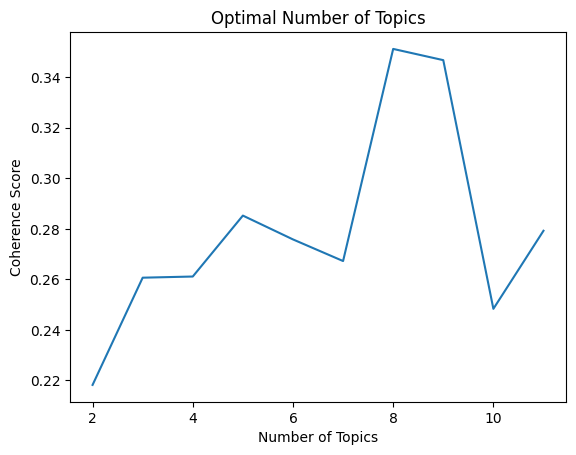

Topic 1: 0.022*"new" + 0.022*"announce" + 0.022*"blockbuster" + 0.022*"way" + 0.022*"late" + 0.022*"office" + 0.022*"election" + 0.022*"theater" + 0.022*"benefit" + 0.022*"world"
Topic 2: 0.077*"break" + 0.077*"record" + 0.077*"theater" + 0.077*"blockbuster" + 0.077*"hit" + 0.077*"late" + 0.077*"movie" + 0.077*"office" + 0.077*"box" + 0.009*"landslide"
Topic 3: 0.072*"new" + 0.072*"technology" + 0.072*"breakthrough" + 0.072*"AI" + 0.072*"promise" + 0.072*"research" + 0.072*"revolutionize" + 0.072*"use" + 0.072*"computer" + 0.072*"way"
Topic 4: 0.022*"new" + 0.022*"nutrition" + 0.022*"month" + 0.022*"hit" + 0.022*"late" + 0.022*"election" + 0.022*"theater" + 0.022*"benefit" + 0.022*"compete" + 0.022*"blockbuster"
Topic 5: 0.077*"World" + 0.077*"Cup" + 0.077*"team" + 0.077*"set" + 0.077*"month" + 0.077*"football" + 0.077*"compete" + 0.077*"begin" + 0.077*"world" + 0.009*"new"
Topic 6: 0.072*"surprising" + 0.072*"food" + 0.072*"benefit" + 0.072*"certain" + 0.072*"finding" + 0.072*"new" + 

In [ ]:
# Write your code here
import spacy
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Sample news articles
news_articles = [
    "The election results were announced yesterday, with a landslide victory for the incumbent party.",
    "The football World Cup is set to begin next month, with teams from around the world competing.",
    "A new technology breakthrough in AI research promises to revolutionize the way we use computers.",
    "The latest blockbuster movie has hit theaters, and it's already breaking box office records.",
    "A new study on health and nutrition reveals surprising findings about the benefits of certain foods."
]

# Tokenize the news articles
nlp = spacy.load("en_core_web_sm")
texts = [nlp(article) for article in news_articles]

# Preprocess the texts (remove stopwords, punctuation, and lemmatize)
texts = [[token.lemma_ for token in doc if not token.is_stop and not token.is_punct] for doc in texts]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Find the optimal number of topics based on coherence score
start, limit, step = 2, 12, 1  # You can adjust these values as needed
coherence_scores = []
for num_topics in range(start, limit, step):
    lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=20)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Plot the coherence scores to select the optimal number of topics
x = range(start, limit, step)
plt.plot(x, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

# Choose the number of topics with the highest coherence score
optimal_num_topics = start + coherence_scores.index(max(coherence_scores))

# Create the final LDA model with the optimal number of topics
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics, passes=20)

# Summarize the topics
topics = lda_model.show_topics(num_topics=optimal_num_topics, num_words=10)
for topic_id, words in topics:
    print(f"Topic {topic_id + 1}: {words}")





## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

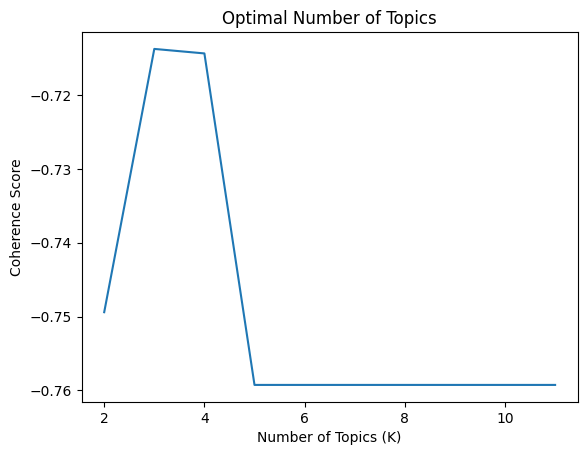

Topic 1: the, world, with, to, new, and, yesterday, incumbent, landslide, election
Topic 2: and, about, benefits, of, nutrition, reveals, certain, findings, foods, on
Topic 3: new, ai, revolutionize, research, computers, promises, in, breakthrough, we, way


In [ ]:
# Write your code here
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import gensim
import matplotlib.pyplot as plt

# Sample news articles
news_articles = [
    "The election results were announced yesterday, with a landslide victory for the incumbent party.",
    "The football World Cup is set to begin next month, with teams from around the world competing.",
    "A new technology breakthrough in AI research promises to revolutionize the way we use computers.",
    "The latest blockbuster movie has hit theaters, and it's already breaking box office records.",
    "A new study on health and nutrition reveals surprising findings about the benefits of certain foods."
]

# TF-IDF Features
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(news_articles)

# Calculate the optimal number of topics (K) based on coherence score
start, limit, step = 2, 12, 1  # You can adjust these values as needed
coherence_scores = []

for num_topics in range(start, limit, step):
    # Perform LSA (Truncated SVD)
    lsa = TruncatedSVD(n_components=num_topics, random_state=42)
    lsa_features = lsa.fit_transform(tfidf_features)

    # Calculate cosine similarity matrix
    cosine_matrix = np.abs(np.dot(lsa_features, lsa_features.T))

    # Calculate coherence score
    coherence_score = np.mean(cosine_matrix) - 1.0
    coherence_scores.append(coherence_score)

# Plot the coherence scores to select the optimal number of topics
x = range(start, limit, step)
plt.plot(x, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

# Choose the number of topics with the highest coherence score
optimal_num_topics = start + coherence_scores.index(max(coherence_scores))

# Perform LSA with the optimal number of topics
lsa = TruncatedSVD(n_components=optimal_num_topics, random_state=42)
lsa_features = lsa.fit_transform(tfidf_features)

# Summarize the topics
terms = tfidf_vectorizer.get_feature_names_out()
lsa_topic_words = []
for i, topic in enumerate(lsa.components_):
    top_idx = topic.argsort()[::-1][:10]
    lsa_topic_words.append([terms[idx] for idx in top_idx])

for i, words in enumerate(lsa_topic_words):
    print(f"Topic {i + 1}: {', '.join(words)}")








## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Topic 1: 0.021*"new" + 0.021*"world" + 0.021*"election" + 0.021*"party" + 0.021*"breaking"
Topic 2: 0.121*"world" + 0.065*"cup" + 0.065*"teams" + 0.065*"football" + 0.065*"set"
Topic 3: 0.068*"already" + 0.068*"movie" + 0.068*"hit" + 0.068*"box" + 0.068*"theaters"
Topic 4: 0.068*"revolutionize" + 0.068*"technology" + 0.068*"research" + 0.068*"new" + 0.068*"use"
Topic 5: 0.021*"world" + 0.021*"new" + 0.021*"month" + 0.021*"election" + 0.021*"party"
Topic 6: 0.068*"new" + 0.068*"study" + 0.068*"nutrition" + 0.068*"health" + 0.068*"foods"
Topic 7: 0.078*"incumbent" + 0.078*"victory" + 0.078*"results" + 0.078*"announced" + 0.078*"landslide"


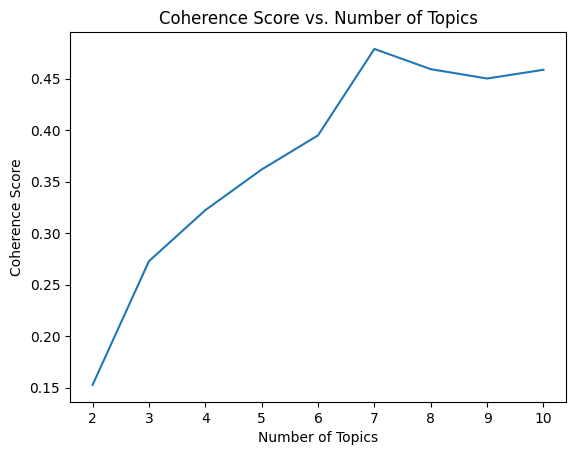

In [42]:
import re
import nltk
from gensim.models import LdaModel
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Sample news articles
news_articles = [
    "The election results were announced yesterday, with a landslide victory for the incumbent party.",
    "The football World Cup is set to begin next month, with teams from around the world competing.",
    "A new technology breakthrough in AI research promises to revolutionize the way we use computers.",
    "The latest blockbuster movie has hit theaters, and it's already breaking box office records.",
    "A new study on health and nutrition reveals surprising findings about the benefits of certain foods."
]

# Preprocessing
preprocessed_articles = []
stop_words = set(stopwords.words('english'))

for article in news_articles:
    # Convert to lowercase and remove punctuation
    article = re.sub(r'[^\w\s]', '', article.lower())

    # Tokenize the article
    tokens = word_tokenize(article)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    preprocessed_articles.append(filtered_tokens)

# Create a dictionary from the preprocessed articles
dictionary = corpora.Dictionary(preprocessed_articles)

# Create a corpus
corpus = [dictionary.doc2bow(article) for article in preprocessed_articles]

# Compute coherence scores for different numbers of topics
coherence_scores = []
for num_topics in range(2, 11):  # You can adjust the range of K
    model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, chunksize=100, passes=10, update_every=2, alpha='auto', iterations=200)
    coherence_model = CoherenceModel(model=model, texts=preprocessed_articles, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((num_topics, coherence_score))

# Select the number of topics with the highest coherence score
best_num_topics, best_coherence_score = max(coherence_scores, key=lambda x: x[1])

# Generate topics with the best coherence score
model = LdaModel(corpus, num_topics=best_num_topics, id2word=dictionary, chunksize=100, passes=10, update_every=2, alpha='auto', iterations=200)

# Summarize the topics
topics = model.print_topics(num_topics=best_num_topics, num_words=5)
for i, topic in topics:
    print(f"Topic {i + 1}: {topic}")

# Plot the coherence score graph
num_topics, coherence_scores = zip(*coherence_scores)
plt.plot(num_topics, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()


## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Sample news articles
news_articles = [
    "The election results were announced yesterday, with a landslide victory for the incumbent party.",
    "The football World Cup is set to begin next month, with teams from around the world competing.",
    "A new technology breakthrough in AI research promises to revolutionize the way we use computers.",
    "The latest blockbuster movie has hit theaters, and it's already breaking box office records.",
    "A new study on health and nutrition reveals surprising findings about the benefits of certain foods."
]

# Convert the text data to a matrix of token counts
tf_vectorizer = CountVectorizer()
tf_matrix = tf_vectorizer.fit_transform(news_articles)

# Initialize and fit the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Specify the number of topics (5 in this example)
lda_model.fit(tf_matrix)

# Get the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words.append([feature_names[i] for i in top_words_idx])
    return top_words

n_top_words = 5  # Number of top words to display for each topic
feature_names = tf_vectorizer.get_feature_names_out()

top_words_per_topic = get_top_words(lda_model, feature_names, n_top_words)

# Print the top words for each topic
for i, words in enumerate(top_words_per_topic):
    print(f"Topic {i+1}: {', '.join(words)}")






Topic 1: the, with, yesterday, landslide, results
Topic 2: the, new, with, to, theaters
Topic 3: and, the, about, of, nutrition
Topic 4: the, world, competing, month, next
Topic 5: new, to, revolutionize, computers, promises


## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)


Based on the previously described implementation of the models, I think the LDA model provides more accuracy than the LSA model.
because the LSA model is unable to effectively represent the multiple meanings of a word. In the data used in the aforementioned statistics,
for example, the word "study" has multiple meanings.
LDA is a well-established and widely used method for topic modeling in natural language processing. LDA is used if You have structured text data where topics are a meaningful concept.
LSA may not capture more complex and nuanced semantic relationships between words and documents.
